#Atividade
1. Realizar Simulações para obter códigos em PCM.
2. Verificar os códigos gerados quando se varia os níveis de quantização.
3. Analisar o que acontece quando se varia a frequência de amostragem.
4. Comentar os resultados das simulações realizadas.

##PCM - PULSE CODE MODULATION

In [6]:
import math

In [25]:
const = (math.pi/180)

In [35]:
# Pulse Code Modulation of Sinusoidal Wave
w = int(input('Enter the frequency of input signal (Hz)\n'))  # frequncy (Hz)
a = int(input('Enter the amplitude of sin wave\n'))           # amplitude
fi = int(input('Enter the phase angle(in degrees)\n'))        # phase angle(in degrees)
sf = int(input('Enter the sampling frequency\n'))             # sample rate
n = int(input('Enter the no. of quantization levels\n'))      # Quantization level

Enter the frequency of input signal (Hz)
4000
Enter the amplitude of sin wave
1
Enter the phase angle(in degrees)
0
Enter the sampling frequency
8000
Enter the no. of quantization levels
3


In [36]:
w = w / np.pi

if sf < 1:
    print('Error')
    exit(1)

if n < 1:
    print('Error in input')
    exit(1)

print('Input Signal -')
print('%dsin(%dt+rad(%d))'%(a, w, fi))

digits = math.ceil(math.log(n, 2))
t = 0.0
theta = w*t+fi*const
val = []
add = 1/sf
for i in range(sf):
    val.append(a*math.ceil(math.sin(w*t+fi*const)*100)/100)
    t += add
print('Sampled values (for one time period)- ')
print(val)
add2 = 2*a/(n-1)
levels = []
for i in range(n):
    levels.append(math.ceil((-a+i*add2)*100)/100)
print('Quantization levels - ')
print(levels)
encoded = val.copy()
binary = []
for i in range(sf):
    for j in range(n-1):
        mid = (levels[j]+levels[j+1])/2
        if levels[j]<= val[i] and val[i] < mid:
            encoded[i] = levels[j]
            binary.append(j)
            break
        elif mid <= val[i] and val[i] <= levels[j+1]:
            encoded[i] = levels[j+1]
            binary.append(j+1)
            break
print('Quantized values - ')
print(encoded)
print('Corresponding level no. (starting from 0)-')
print(binary)
print('Encoded binary message')
list_binary = []
for i in range(sf):
    temp = format(binary[i], 'b')
    while len(temp) < digits:
        temp = '0'+temp
    print(temp, end=' ')
    list_binary.append(temp)

Input Signal -
1sin(1273t+rad(0))
Sampled values (for one time period)- 
[0.0, 0.16, 0.32, 0.46, 0.6, 0.72, 0.82, 0.9, 0.96, 1.0, 1.0, 0.99, 0.95, 0.88, 0.8, 0.69, 0.57, 0.43, 0.28, 0.12, -0.04, -0.19, -0.35, -0.49, -0.62, -0.74, -0.83, -0.91, -0.96, -0.99, -0.99, -0.97, -0.92, -0.85, -0.76, -0.65, -0.52, -0.38, -0.23, -0.07, 0.09, 0.24, 0.4, 0.54, 0.66, 0.77, 0.87, 0.94, 0.98, 1.0, 1.0, 0.97, 0.92, 0.84, 0.74, 0.63, 0.5, 0.35, 0.2, 0.04, -0.12, -0.27, -0.42, -0.56, -0.68, -0.79, -0.88, -0.94, -0.98, -0.99, -0.98, -0.95, -0.89, -0.81, -0.7, -0.58, -0.45, -0.3, -0.15, 0.01, 0.17, 0.32, 0.47, 0.6, 0.72, 0.83, 0.91, 0.96, 1.0, 1.0, 0.99, 0.95, 0.88, 0.79, 0.68, 0.56, 0.42, 0.27, 0.12, -0.04, -0.2, -0.35, -0.5, -0.63, -0.74, -0.84, -0.91, -0.96, -0.99, -0.99, -0.97, -0.92, -0.85, -0.76, -0.64, -0.51, -0.37, -0.22, -0.06, 0.09, 0.25, 0.4, 0.54, 0.67, 0.78, 0.87, 0.94, 0.98, 1.0, 1.0, 0.97, 0.91, 0.84, 0.74, 0.62, 0.49, 0.34, 0.19, 0.03, -0.13, -0.28, -0.43, -0.57, -0.69, -0.79, -0.88, -0.94

In [37]:
sorted(set(list_binary))

['00', '01', '10']

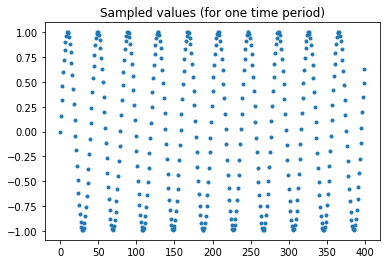

In [38]:
plt.title('Sampled values (for one time period)')
plt.plot(val[0:400], '.')
plt.show()

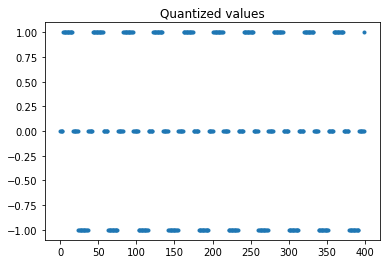

In [39]:
plt.title('Quantized values')
plt.plot(encoded[:400], '.')
plt.show()

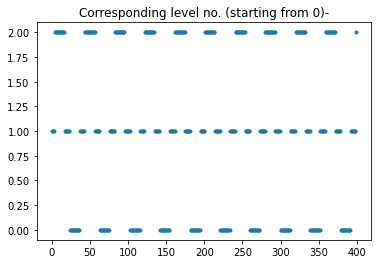

In [40]:
plt.title('Corresponding level no. (starting from 0)-')
plt.plot(binary[0:400], '.')
plt.show()

##Conclusão

Executando e mudando os parâmetros, é possível tirar algumas conclusões em relação as perguntas feitas inicialmente:  
Ao mudar a frequência de amostragem é necessário se atentar ao critério de nyquist, se não ocorre aliasing.
Ao mudar o número de níveis de quantização teremos a mensagem encodada na menor quantidade de bits possíveis para aquele nível (com 3 níveis, por exemplo, precisa de 2 bits, pois 2^2=4, e assim sucessivamente)  
Ao aumentar a quantidade de níveis de quantização, teremos uma maior "resolução" do sinal gerado, isso pois existe uma gama maior de valores que podem enquadrar os valores reais do sinal.